### Prepare a classification model using SVM for salary data 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('SalaryData_Train(1).csv')

In [23]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
df.shape

(30161, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [26]:
df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [27]:
df.rename({'Salary':'salary'},axis=1,inplace=True)

In [28]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'salary'],
      dtype='object')

In [29]:
len(df)

30161

In [30]:
df.isnull().sum().sum()

0

In [31]:
df.duplicated().sum()

3258

In [35]:
pd.reset_option('^display.', silent=True)
df[df.duplicated(keep=False)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
12,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
16,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [37]:
df.drop_duplicates(keep='first',inplace=True)

In [39]:
df[df.duplicated(keep=False)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary


In [38]:
df.shape

(26903, 14)

In [87]:
df.columns = df.columns.str.strip()

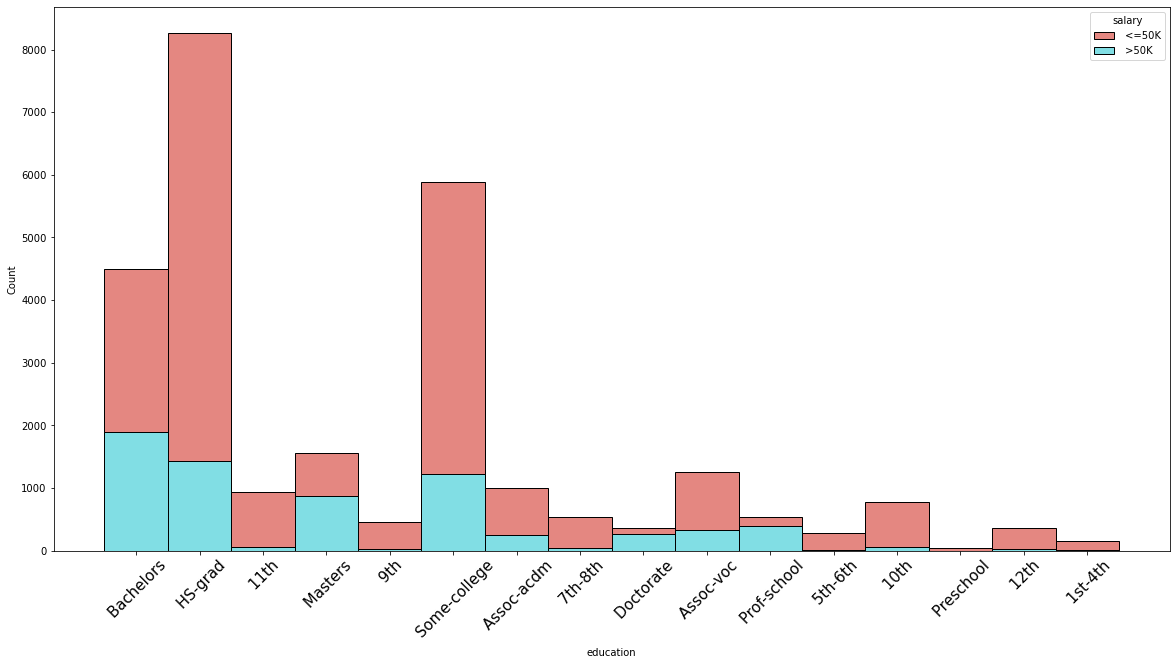

In [103]:
plt.figure(figsize=(20,10))
sns.histplot(binwidth=0.5, x="education", hue="salary", data=df, stat="count", multiple="stack",palette='hls')
plt.xticks(rotation=45,fontsize=15);

<font color='cyan'><b>From the fig., there are more number of people with Bachelors and HS-grad and among them more number of people have salary <=50k compared to those >50k. Among those with Masters, those with salary >50k are more comapred to those with <=50k. There are very less number of Doctorates but most of them have salary >50k, same with those from Prof-school too.

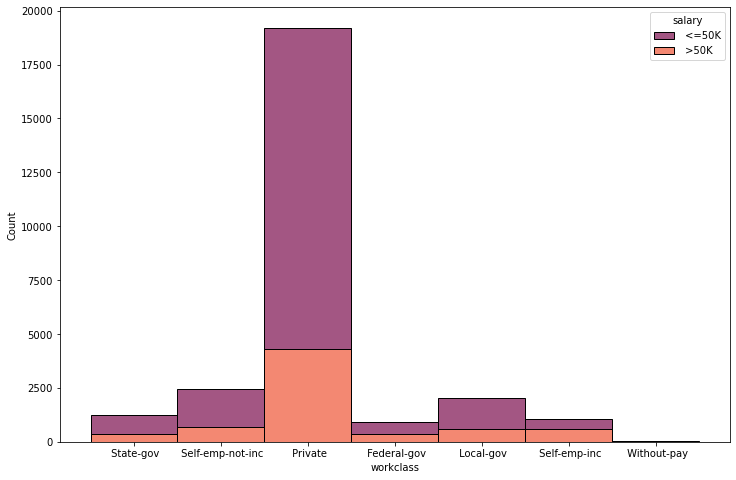

In [47]:
plt.figure(figsize=(12,8))
sns.histplot(binwidth=0.5, x="workclass", hue="salary", data=df, stat="count", multiple="stack",palette='rocket');

<font color='purple'><b>From the fig.,there are large number of people working in private sector.

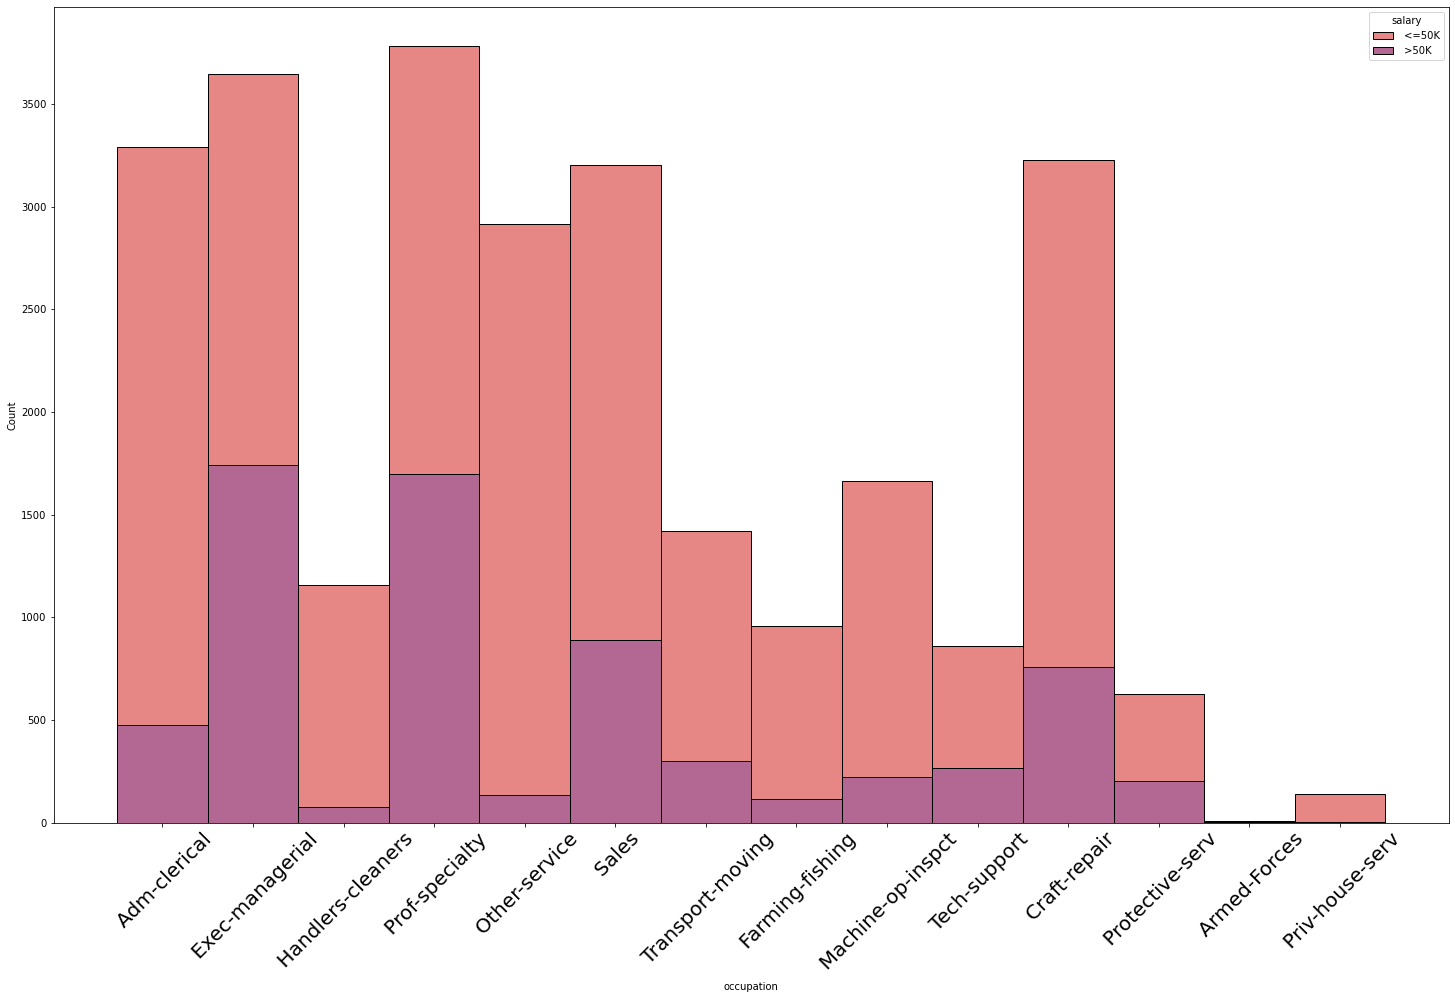

In [101]:
plt.figure(figsize=(25,15))
sns.histplot(binwidth=0.5, x="occupation", hue="salary", data=df, stat="count", multiple="stack",palette='flare')
plt.xticks(rotation=45,fontsize=20);

<font color='purple'><b>From the fig., those in Exec-managerial and Prof-speciality have salary >50k largely.

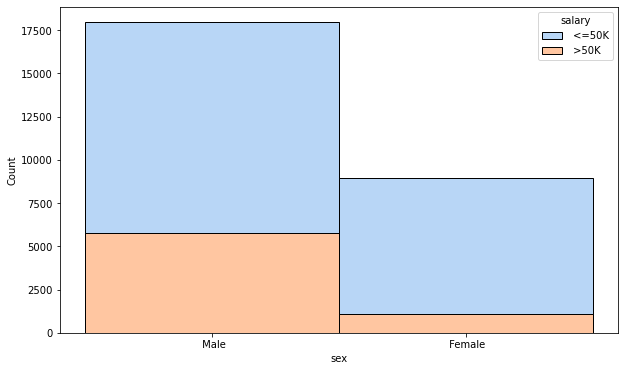

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(binwidth=0.5, x="sex", hue="salary", data=df, stat="count", multiple="stack",palette='pastel');

<font color='hotpink'><b>From the fig., there are large number of Male employees compared to Female and very less number of Female have salary >50k compared to Male.

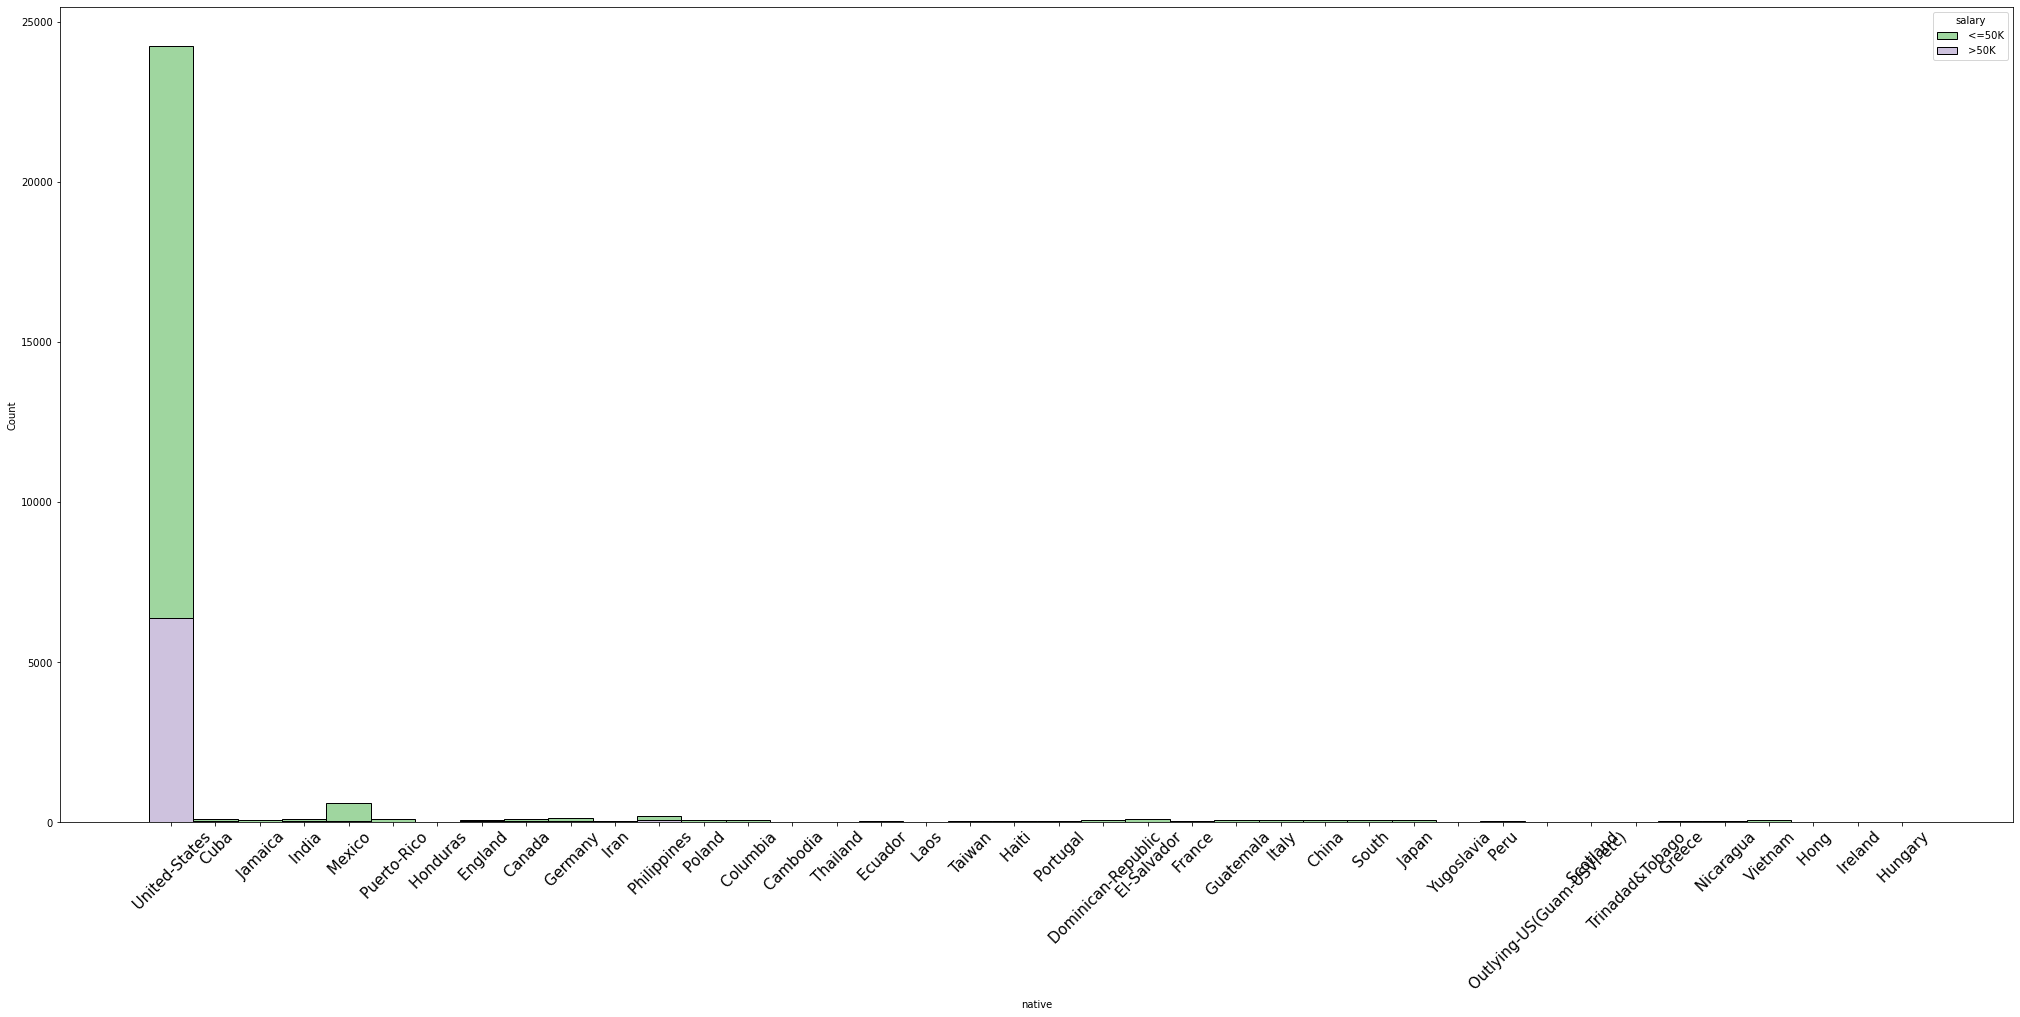

In [215]:
plt.figure(figsize=(35,15))
sns.histplot(binwidth=0.5, x="native", hue="salary", data=df, stat="count", multiple="stack",palette='Accent')
plt.xticks(rotation='45',fontsize=15);

<font color='green'><b>From the fig., considerable number of employees are from US.

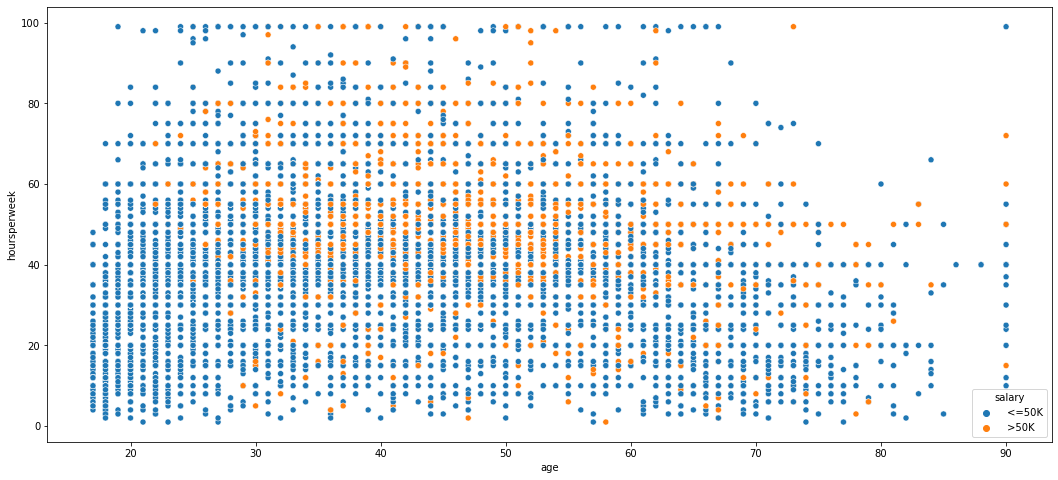

In [68]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df,x='age',y='hoursperweek',hue='salary');

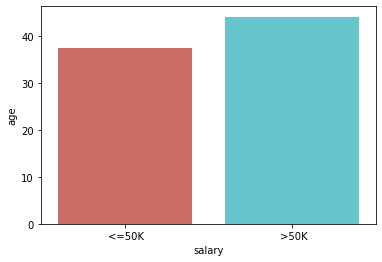

In [71]:
sns.barplot(x="salary", y='age', data=df,palette='hls',ci=None);

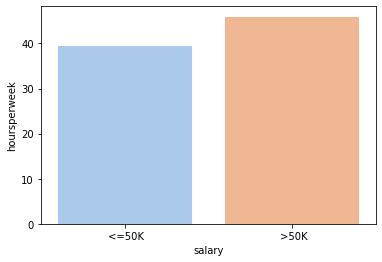

In [73]:
sns.barplot(x="salary", y='hoursperweek', data=df,palette='pastel',ci=None);

In [75]:
df.salary.value_counts()

 <=50K    20023
 >50K      6880
Name: salary, dtype: int64

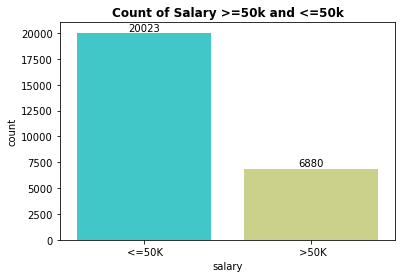

In [74]:
plt.title('Count of Salary >=50k and <=50k',fontweight='bold')
ax = sns.countplot(x='salary',data=df,palette='rainbow');
for i in ax.containers:
    ax.bar_label(i,)

<font color='peach'><b>So there is class imbalance in the target variable.

### <font color='magenta'><b>Encode the Categorical variables :

In [197]:
df_enc = df.copy()

In [198]:
df_enc.drop(['education'],axis=1,inplace=True)     # since educationno column is already given

In [199]:
df_enc.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<font color='brown'><I><b>Encoding Workclass based on their salary rate :

In [166]:
tab1 = pd.crosstab(df['salary'],df['workclass']).apply(lambda x: x/x.sum() * 100)
tab1

workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
salary,,,,,,,
<=50K,61.679225,70.556107,77.562067,44.42326,71.287536,72.944932,100.0
>50K,38.320775,29.443893,22.437933,55.57674,28.712464,27.055068,0.0


In [167]:
tab1.columns

Index([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object', name='workclass')

In [168]:
tab1 = tab1.transpose()
tab1

salary,<=50K,>50K
workclass,,
Federal-gov,61.679225,38.320775
Local-gov,70.556107,29.443893
Private,77.562067,22.437933
Self-emp-inc,44.423260,55.576740
Self-emp-not-inc,71.287536,28.712464
State-gov,72.944932,27.055068
Without-pay,100.000000,0.000000


In [169]:
tab1.columns

Index([' <=50K', ' >50K'], dtype='object', name='salary')

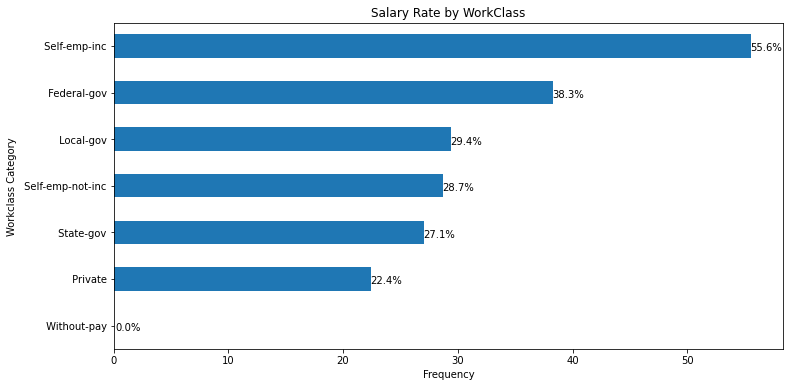

In [184]:
plot_job = tab1[' >50K'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                           
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      tab1[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [191]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [192]:
wc_mapping = {' State-gov':2, ' Self-emp-not-inc':3, ' Private':1, ' Federal-gov':5,
               ' Local-gov':4, ' Self-emp-inc':6, ' Without-pay':0}

In [200]:
df_enc['workclass'] = df['workclass'].map(wc_mapping)
df_enc.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,39,2,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,3,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<font color='brown'><I><b>Encoding Occupation based on their salary rate :

In [185]:
tab2 = pd.crosstab(df['salary'],df['occupation']).apply(lambda x: x/x.sum() * 100)
tab2

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
salary,,,,,,,,,,,,,,
<=50K,85.566697,88.888889,76.556209,52.194185,88.087774,93.27006,86.606607,95.470144,99.29078,55.114988,67.731629,72.230889,69.230769,78.732394
>50K,14.433303,11.111111,23.443791,47.805815,11.912226,6.72994,13.393393,4.529856,0.70922,44.885012,32.268371,27.769111,30.769231,21.267606


In [186]:
tab2 = tab2.transpose()
tab2

salary,<=50K,>50K
occupation,,
Adm-clerical,85.566697,14.433303
Armed-Forces,88.888889,11.111111
Craft-repair,76.556209,23.443791
Exec-managerial,52.194185,47.805815
Farming-fishing,88.087774,11.912226
Handlers-cleaners,93.270060,6.729940
Machine-op-inspct,86.606607,13.393393
Other-service,95.470144,4.529856
Priv-house-serv,99.290780,0.709220


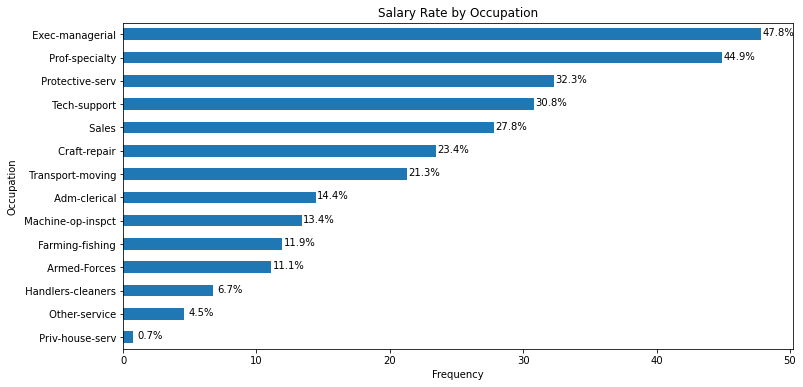

In [190]:
plot_job2 = tab2[' >50K'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                           
plt.title('Salary Rate by Occupation')
plt.xlabel('Frequency')
plt.ylabel('Occupation')

# Label each bar
for rec1, label1 in zip(plot_job2.patches,
                      tab2[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job2.text(rec1.get_width()+1.3, 
                  rec1.get_y()+ rec1.get_height()-0.4, 
                  label1+'%', 
                  ha = 'center', 
                  va='bottom')

In [194]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [195]:
occp_mapping = {' Adm-clerical':6, ' Exec-managerial':13, ' Handlers-cleaners':2,
       ' Prof-specialty':12, ' Other-service':1, ' Sales':9, ' Transport-moving':7,
       ' Farming-fishing':4, ' Machine-op-inspct':5, ' Tech-support':10,
       ' Craft-repair':8, ' Protective-serv':11, ' Armed-Forces':3,
       ' Priv-house-serv':0}

In [201]:
df_enc['occupation'] = df['occupation'].map(occp_mapping)
df_enc.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,salary
0,39,2,13,Never-married,6,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,3,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,9,Divorced,2,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,13,Married-civ-spouse,12,Wife,Black,Female,0,0,40,Cuba,<=50K


<font color='brown'><I><b>Encoding Native based on their salary rate :

In [202]:
tab3 = pd.crosstab(df['salary'],df['native']).apply(lambda x: x/x.sum() * 100)
tab3

native,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,61.111111,66.35514,70.588235,96.428571,72.826087,97.014925,85.185185,91.0,65.116279,55.555556,...,88.235294,88.990826,81.818182,80.28169,54.761905,82.352941,88.888889,73.754071,92.1875,62.5
>50K,38.888889,33.64486,29.411765,3.571429,27.173913,2.985075,14.814815,9.0,34.883721,44.444444,...,11.764706,11.009174,18.181818,19.71831,45.238095,17.647059,11.111111,26.245929,7.8125,37.5


In [204]:
tab3 = tab3.transpose()

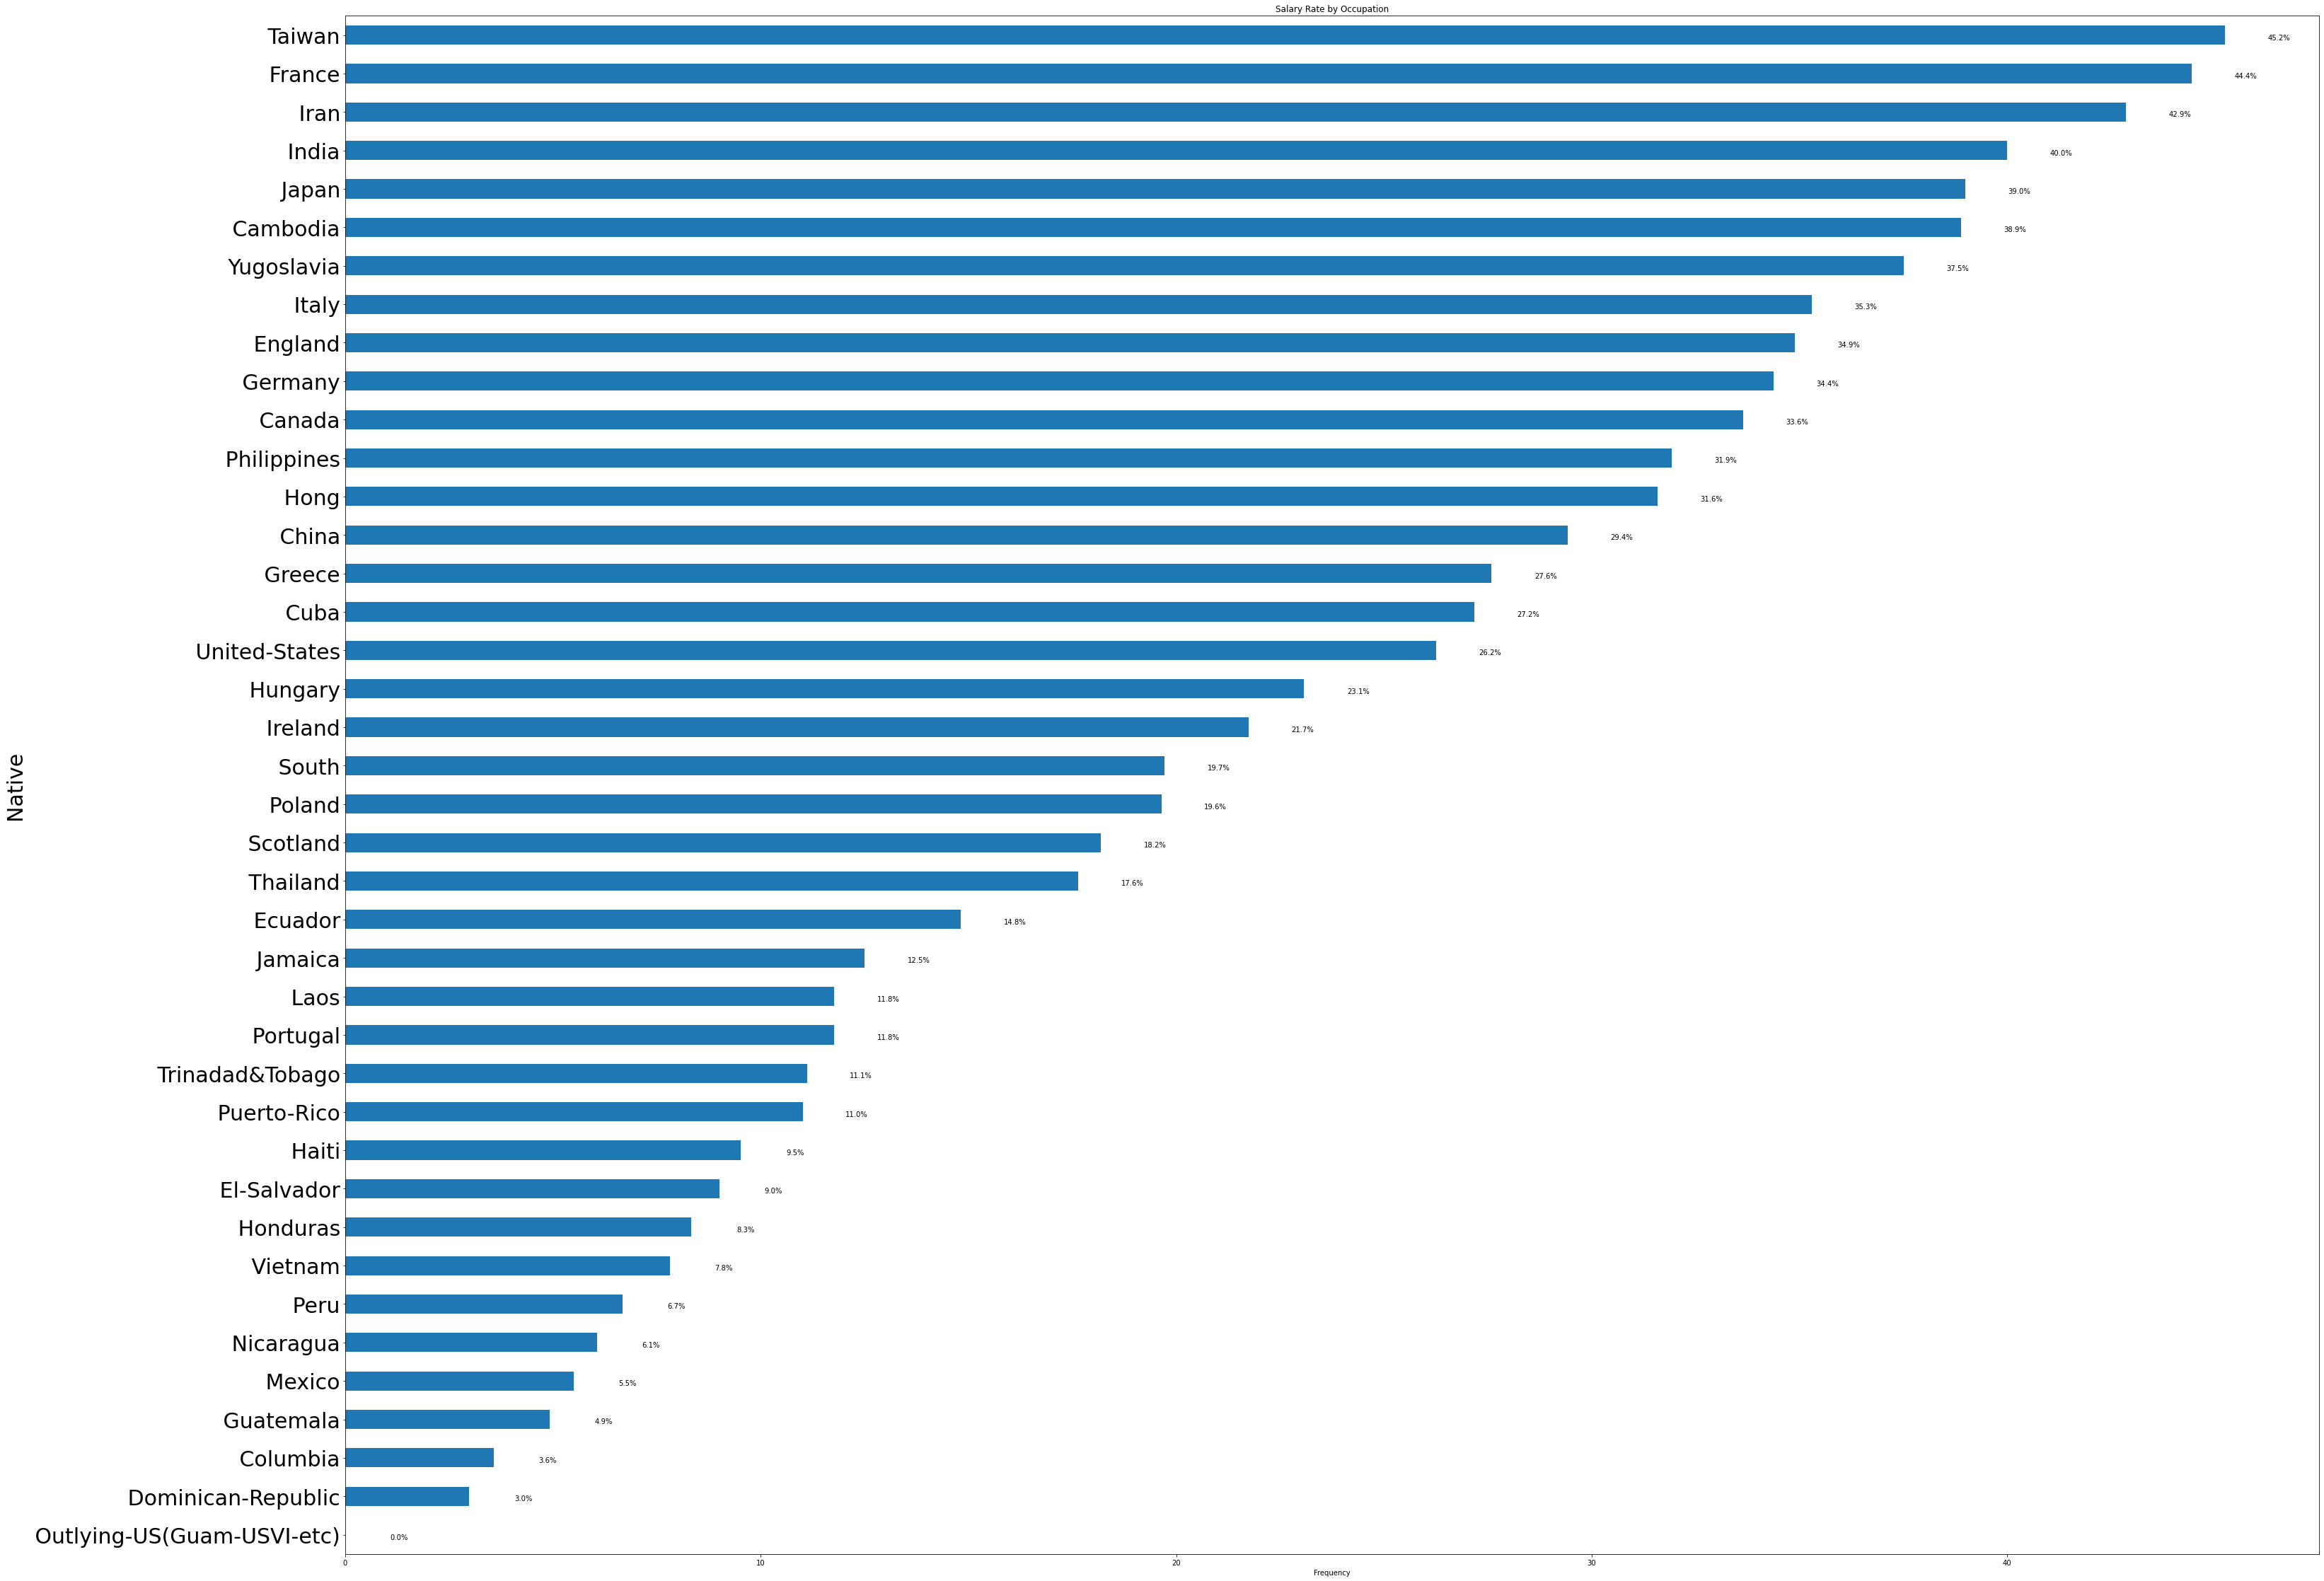

In [218]:
plot_job3 = tab3[' >50K'].sort_values(ascending = True).plot(kind ='barh',figsize = (50,40))
                                                                           
plt.title('Salary Rate by Occupation')
plt.xlabel('Frequency')
plt.ylabel('Native',fontsize=30)
plt.yticks(fontsize=30)

# Label each bar
for rec2, label2 in zip(plot_job3.patches,
                      tab3[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job3.text(rec2.get_width()+1.3, 
                  rec2.get_y()+ rec2.get_height()-0.4, 
                  label2+'%', 
                  ha = 'center', 
                  va='bottom')

In [219]:
df.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [220]:
nat_mapping = {' United-States':23, ' Cuba':24, ' Jamaica':15, ' India':36, ' Mexico':4,
       ' Puerto-Rico':11, ' Honduras':8, ' England':31, ' Canada':29, ' Germany':30,
       ' Iran':37, ' Philippines':28, ' Poland':19, ' Columbia':2, ' Cambodia':34,
       ' Thailand':17, ' Ecuador':16, ' Laos':14, ' Taiwan':39, ' Haiti':10, ' Portugal':13,
       ' Dominican-Republic':1, ' El-Salvador':9, ' France':38, ' Guatemala':3,
       ' Italy':32, ' China':26, ' South':20, ' Japan':35, ' Yugoslavia':33, ' Peru':6,
       ' Outlying-US(Guam-USVI-etc)':0, ' Scotland':18, ' Trinadad&Tobago':12,
       ' Greece':25, ' Nicaragua':5, ' Vietnam':7, ' Hong':27, ' Ireland':21,
       ' Hungary':22}

In [253]:
df_enc['native'] = df['native'].map(nat_mapping)
df_enc.head()

,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,salary,maritalstatus_ Married-AF-spouse,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,2,13,6,2174,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
1,50,3,13,13,0,0,13,23,<=50K,0,...,0,0,0,0,0,0,0,0,1,1
2,38,1,9,2,0,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
3,53,1,7,2,0,0,40,23,<=50K,0,...,0,0,0,0,0,0,1,0,0,1
4,28,1,13,12,0,0,40,24,<=50K,0,...,0,0,0,0,1,0,1,0,0,0


<font color='brown'><I><b>Get Dummies :

In [222]:
df_enc = pd.get_dummies(data=df_enc,columns=['maritalstatus','relationship','race','sex'],drop_first=True)
df_enc.head()

,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,salary,maritalstatus_ Married-AF-spouse,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,2,13,6,2174,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
1,50,3,13,13,0,0,13,23,<=50K,0,...,0,0,0,0,0,0,0,0,1,1
2,38,1,9,2,0,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
3,53,1,7,2,0,0,40,23,<=50K,0,...,0,0,0,0,0,0,1,0,0,1
4,28,1,13,12,0,0,40,24,<=50K,0,...,0,0,0,0,1,0,1,0,0,0


In [224]:
df_enc.shape

(26903, 25)

### <font color='magenta'><b>Split into Independent and Dependent variables :

In [225]:
X = df_enc.drop(['salary'],axis=1)

In [226]:
y = df_enc['salary']

In [227]:
y.value_counts()

 <=50K    20023
 >50K      6880
Name: salary, dtype: int64

### <font color='orange'><b>Correct the Imbalanced data with Oversampling using SMOTE algorithm :

In [233]:
from imblearn.over_sampling import SMOTE

In [235]:
sm = SMOTE(random_state = 0)

In [236]:
X_sm, y_sm = sm.fit_resample(X, y.ravel())

In [237]:
print("After OverSampling, counts of label '>50K': {}".format(sum(y_sm == ' >50K')))
print("After OverSampling, counts of label '<=50K': {}".format(sum(y_sm == ' <=50K')))

After OverSampling, counts of label '>50K': 20023
After OverSampling, counts of label '<=50K': 20023


### <font color='magenta'><b>Feature Scaling :

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()

In [238]:
X_scl = scaler.fit_transform(X_sm)
X_scl

array([[-0.1231845 ,  0.12358977,  0.96102017, ..., -0.07650072,
         0.42049943,  0.65189909],
       [ 0.75920641,  0.82313405,  0.96102017, ..., -0.07650072,
         0.42049943,  0.65189909],
       [-0.20340186, -0.57595452, -0.60771574, ..., -0.07650072,
         0.42049943,  0.65189909],
       ...,
       [-0.60448864, -0.57595452, -0.60771574, ..., -0.07650072,
         0.42049943,  0.65189909],
       [ 1.16029319,  2.92176689,  1.35320415, ..., -0.07650072,
         0.42049943,  0.65189909],
       [-0.44405392,  1.52267833, -0.21553176, ..., -0.07650072,
         0.42049943,  0.65189909]])

## <font color='purple'><b>Support Vector Classifier :

In [239]:
from sklearn.svm import SVC

In [240]:
svc = SVC(random_state=0)

In [245]:
svc.fit(X_scl,y_sm)

SVC(random_state=0)

In [246]:
train_pred = svc.predict(X_scl)

In [247]:
from sklearn.metrics import accuracy_score

In [248]:
accuracy_score(y_sm,train_pred)

0.8552165010238226

## <font color='green'><b>Testing Data :

In [249]:
df_test = pd.read_csv('SalaryData_Train(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [250]:
df_test_enc = df_test.copy()

In [251]:
df_test_enc.drop(['education'],axis=1,inplace=True)

In [255]:
df_test_enc['workclass'] = df_test['workclass'].map(wc_mapping)
df_test_enc['occupation'] = df_test['occupation'].map(occp_mapping)
df_test_enc['native'] = df_test['native'].map(nat_mapping)
df_test_enc = pd.get_dummies(data=df_test_enc,columns=['maritalstatus','relationship','race','sex'],drop_first=True)
df_test_enc.head()

,age,workclass,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary,maritalstatus_ Married-AF-spouse,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,39,2,13,6,2174,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
1,50,3,13,13,0,0,13,23,<=50K,0,...,0,0,0,0,0,0,0,0,1,1
2,38,1,9,2,0,0,40,23,<=50K,0,...,1,0,0,0,0,0,0,0,1,1
3,53,1,7,2,0,0,40,23,<=50K,0,...,0,0,0,0,0,0,1,0,0,1
4,28,1,13,12,0,0,40,24,<=50K,0,...,0,0,0,0,1,0,1,0,0,0


In [257]:
X_t = df_test_enc.drop(['Salary'],axis=1)
y_t = df_test_enc['Salary']

In [258]:
X_t_scl = scaler.transform(X_t)

In [259]:
svc.fit(X_t_scl,y_t)

SVC(random_state=0)

In [260]:
test_pred = svc.predict(X_t_scl)

In [261]:
accuracy_score(y_t,test_pred)

0.8527900268558735

<font color='peach'><b>So the model is performing amazingly well with train and test accuracy of 85.52% and 85.27% .

In [265]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [263]:
print(classification_report(y_sm, train_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85     20023
        >50K       0.82      0.90      0.86     20023

    accuracy                           0.86     40046
   macro avg       0.86      0.86      0.85     40046
weighted avg       0.86      0.86      0.85     40046



In [264]:
print(classification_report(y_t, test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.91     22653
        >50K       0.77      0.58      0.66      7508

    accuracy                           0.85     30161
   macro avg       0.82      0.76      0.78     30161
weighted avg       0.85      0.85      0.84     30161



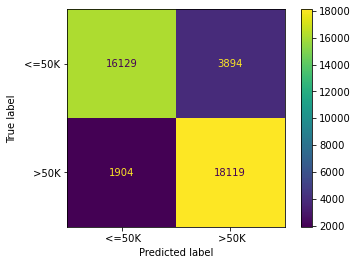

In [266]:
ConfusionMatrixDisplay.from_predictions(y_sm,train_pred,display_labels=y.unique())
plt.grid(False);

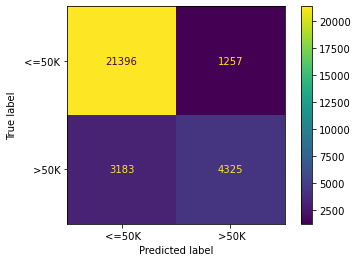

In [268]:
ConfusionMatrixDisplay.from_predictions(y_t,test_pred,display_labels=y.unique())
plt.grid(False);